In [1]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_mobilenet_v3_large', pretrained=True)
model.eval()


Using cache found in /home/ujjwal/.cache/torch/hub/pytorch_vision_v0.10.0
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /home/ujjwal/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


  0%|          | 0.00/161M [00:00<?, ?B/s]

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

Using cache found in /home/ujjwal/.cache/torch/hub/pytorch_vision_v0.10.0


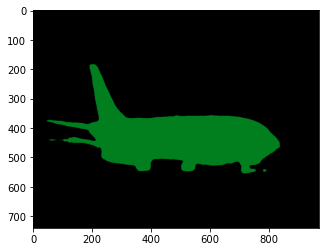

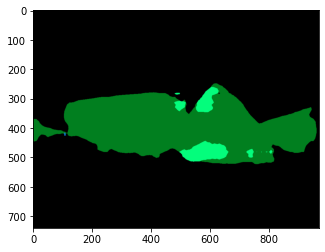

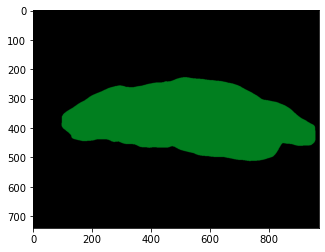

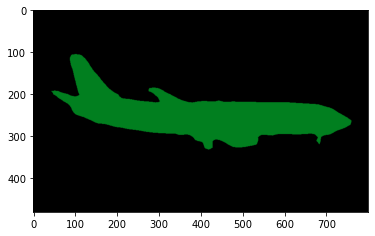

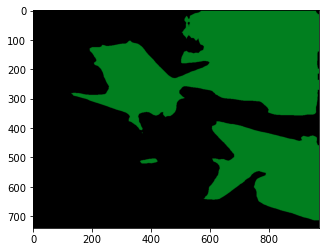

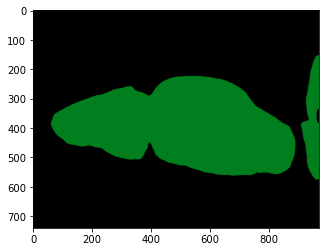

In [8]:
import os
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the DeepLab model (choose the appropriate variant)
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
model.eval()

# Define the path to your aircraft images folder
folder_path = 'aircrafts'

# Define the transformation for preprocessing
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Iterate through the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load and preprocess the image
        input_image = Image.open(os.path.join(folder_path, filename)).convert("RGB")
        input_tensor = preprocess(input_image)
        input_batch = input_tensor.unsqueeze(0)  # create a mini-batch as expected by the model

        # Move the input and model to GPU for speed if available
        if torch.cuda.is_available():
            input_batch = input_batch.to('cuda')
            model.to('cuda')

        # Perform inference and get segmentation predictions
        with torch.no_grad():
            output = model(input_batch)['out'][0]
        output_predictions = output.argmax(0)

        # Create a color palette for visualization
        palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
        colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
        colors = (colors % 255).numpy().astype("uint8")

        # Plot the semantic segmentation predictions with colors representing classes
        r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
        r.putpalette(colors)

        plt.imshow(r)
        plt.show()


Using cache found in /home/ujjwal/.cache/torch/hub/pytorch_vision_v0.10.0


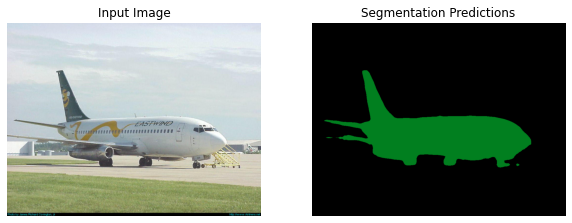

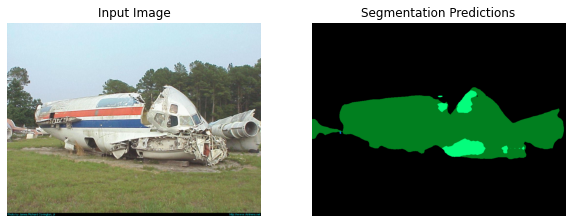

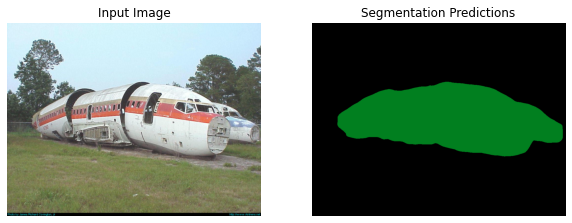

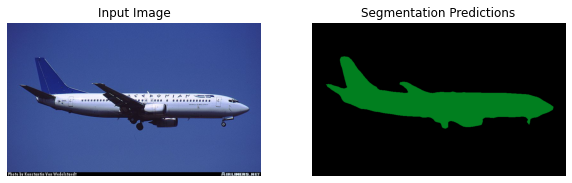

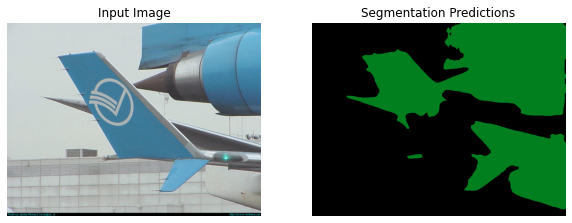

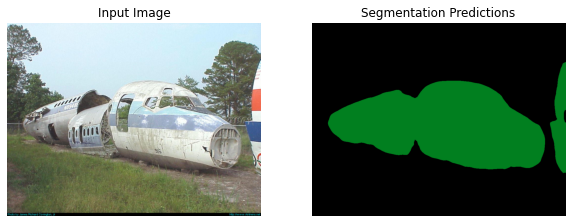

In [10]:
import os
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the DeepLab model (choose the appropriate variant)
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
model.eval()

folder_path = 'aircrafts'

# Define the transformation for preprocessing
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Iterate through the images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load and preprocess the image
        input_image = Image.open(os.path.join(folder_path, filename)).convert("RGB")
        input_tensor = preprocess(input_image)
        input_batch = input_tensor.unsqueeze(0)  # create a mini-batch as expected by the model

        # Move the input and model to GPU for speed if available
        if torch.cuda.is_available():
            input_batch = input_batch.to('cuda')
            model.to('cuda')

        # Perform inference and get segmentation predictions
        with torch.no_grad():
            output = model(input_batch)['out'][0]
        output_predictions = output.argmax(0)

        # Create a color palette for visualization
        palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
        colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
        colors = (colors % 255).numpy().astype("uint8")

        # Plot the input image and semantic segmentation predictions
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(input_image)
        axs[0].axis('off')
        axs[0].set_title('Input Image')
        
        # Plot the semantic segmentation predictions with colors representing classes
        r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
        r.putpalette(colors)

        axs[1].imshow(r)
        axs[1].axis('off')
        axs[1].set_title('Segmentation Predictions')
        
        plt.show()
